F:\Uninstall\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


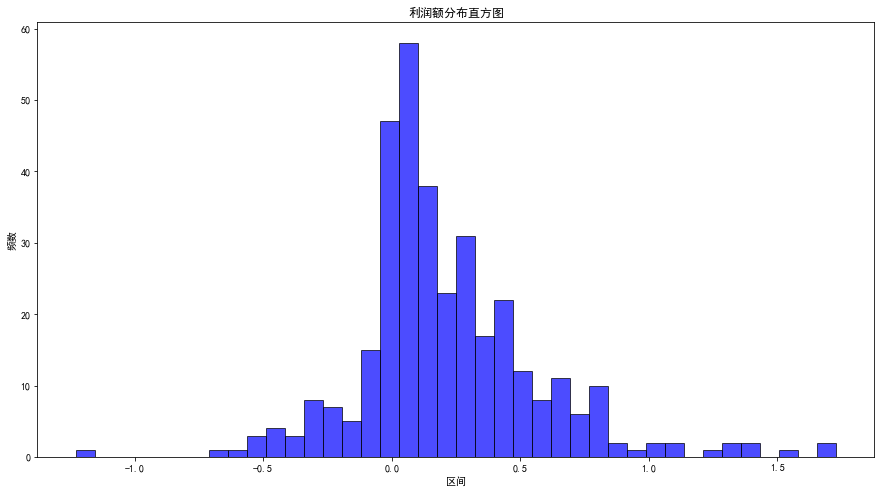

In [2]:
# -*- coding: utf-8 -*-

#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
mpl.rcParams['font.sans-serif']=['SimHei']     #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号
import pymysql

#连接Hadoop数据库
v1 = []
v2 = []
conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT order_date,ROUND(SUM(profit)/10000,2) FROM orders WHERE dt=2019 GROUP BY order_date"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

plt.figure(figsize=(15,8))         #设置图形大小
plt.hist(v2, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数")
# 显示图标题
plt.title("利润额分布直方图")
plt.show()